# Instalação/Importação de bibliotecas


In [1]:
# Descomentar para instalar bibliotecas, se necessário

# !pip install pandas
import pandas as pd
# !pip install seaborn
import seaborn as seab
# !pip install statistics
import statistics as stat
# !pip install matplotlib
import matplotlib.pyplot as plt
# !pip install numpy
import numpy as np
# !pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier
# !pip install datetime
from datetime import datetime
# !pip install pmdarima
from pmdarima.arima import auto_arima
# !pip install logging
from logging import exception


# Importação e resumo do Dataset

In [2]:
# Alterei o nome da base de dados original para "database"
df = pd.read_excel(io='/content/database.xlsx') # Diretório do Google Colab

# Ordena o df para melhor visualização
df = df.sort_values(by=['reference_month','frn_id'])

In [3]:
df.head()

,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost
40600,2024-08-01,3340,BFFSBFF,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,0,904.63,NaN,NaN
84499,2024-08-01,19143,SEM MARCA,CONTA ESTRATEGICA,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,0,1233.16,NaN,NaN
114105,2024-08-01,21722,SEM MARCA,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0,0.00,NaN,NaN
124306,2024-08-01,21972,SEM MARCA,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,0,84.30,-123.57,NaN
40893,2024-08-01,22445,SEM MARCA,CONTA ESTRATEGICA,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,0,1586.67,-99.35,NaN


In [4]:
# Contagem de linhas e colunas
df.shape

(128603, 15)

In [5]:
# Visão geral de possíveis valores NA nas colunas
df.isna().sum()
# Identificado que apenas 'delivery_cost' e 'occurrences_cost' têm valores NA para tratar.

,0
reference_month,0
frn_id,0
group_name,0
performance_classification,0
business_model,0
orders,0
gmv_basket,0
delivery_fee,0
paid_delivery_fee,0
commission,0


# Análise Exploratória dos dados (EDA)

Realizando uma análise detalhada dos dados para garantir a qualidade do dataset.

## Dados categóricos

In [6]:
# Contagem de valores categóricos
df.groupby('reference_month').size()

,0
reference_month,
2024-08-01,41879
2024-09-01,42959
2024-10-01,43765


<Axes: xlabel='reference_month'>

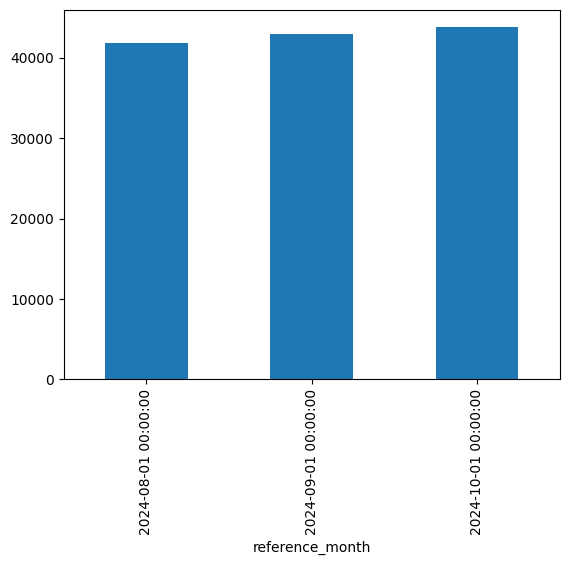

In [7]:
# Visualizar distribuição dos dados
df.groupby('reference_month').size().plot.bar()

In [8]:
coluna = df.groupby('group_name').size()
coluna

,0
group_name,
AADSTZV,16
AGUADEV,2
ALASSUS,76
ALESDEZ,24
ASEULUY,27
...,...
ZEUYYUT,3
ZEYAPVP,7
ZFETMZF,63


<Axes: xlabel='group_name'>

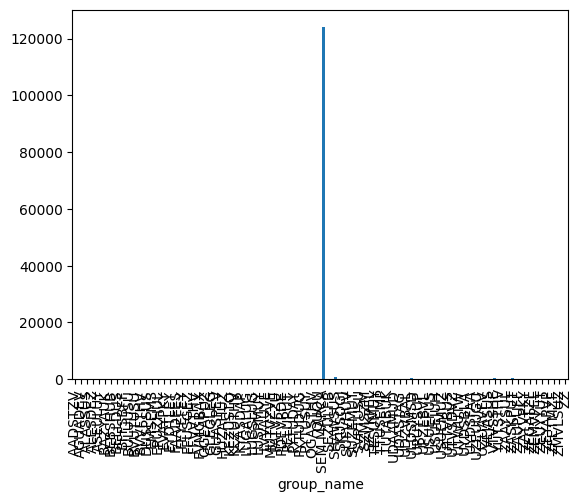

In [9]:
# Visualizando para identificar distribuição dos dados e possíveis outliers
df.groupby('group_name').size().plot.bar()
# Muitos registros atribuídos a 'SEM MARCA'. Como representam 96% (123984 de 128603) dos dados, entendo que não representa um problema para o dataset, mesmo sendo um outlier.

In [10]:
# explorando registros SEM MARCA
coluna = df['group_name']
df.loc[coluna == 'SEM MARCA' ]

,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost
84499,2024-08-01,19143,SEM MARCA,CONTA ESTRATEGICA,MARKETPLACE,594,50854.48,3761.00,3030.00,5661.47,0.00,0,1233.16,NaN,NaN
114105,2024-08-01,21722,SEM MARCA,LONG TAIL,MARKETPLACE,2,126.00,20.00,20.00,7.08,0.00,0,0.00,NaN,NaN
124306,2024-08-01,21972,SEM MARCA,LONG TAIL,MARKETPLACE,49,4180.31,80.00,80.00,389.04,0.00,0,84.30,-123.57,NaN
40893,2024-08-01,22445,SEM MARCA,CONTA ESTRATEGICA,MARKETPLACE,1675,81340.50,2513.00,2513.00,8389.39,136.62,0,1586.67,-99.35,NaN
79523,2024-08-01,22790,SEM MARCA,CONTA ESTRATEGICA,MARKETPLACE,710,77955.21,240.00,215.00,8587.37,0.00,0,1790.94,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76444,2024-10-01,3364914,SEM MARCA,LONG TAIL,MARKETPLACE,2,43.00,0.00,0.00,2.64,0.99,0,0.70,NaN,NaN
54022,2024-10-01,3365027,SEM MARCA,LONG TAIL,MARKETPLACE,1,35.00,6.00,6.00,0.00,0.00,0,0.00,NaN,NaN
74173,2024-10-01,3365141,SEM MARCA,LONG TAIL,FULL_SERVICE,1,26.00,4.99,4.99,5.98,0.00,0,0.83,-7.24,NaN
117757,2024-10-01,3365151,SEM MARCA,LONG TAIL,FULL_SERVICE,2,42.00,7.98,7.98,3.22,0.99,0,0.45,-11.38,NaN


In [11]:
# Group_name válido parece estar entre 6 e 7 caracteres. Filtrando tudo que é menor que isso.
df.loc[df['group_name'].str.len() < 6]
# Alguns registros atribuídos a 'ZZ' e 'QUQU', que parecem estar fora do padrão da coluna. Agrupar em "SEM MARCA".

,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost
30694,2024-08-01,180583,QUQU,CONTA ESTRATEGICA,FULL_SERVICE,15,1967.70,335.85,312.86,305.24,0.00,0,49.62,-303.3500,NaN
80973,2024-08-01,180583,QUQU,CONTA ESTRATEGICA,MARKETPLACE,460,56447.24,1742.49,1202.25,4468.95,0.00,0,1291.24,NaN,NaN
101893,2024-08-01,1267306,ZZ,KEY ACCOUNT,MARKETPLACE,30,1486.00,185.00,100.00,151.22,0.00,0,33.73,-15.0300,NaN
93384,2024-08-01,2045394,ZZ,KEY ACCOUNT,MARKETPLACE,67,3885.48,409.33,209.58,453.77,0.00,0,116.74,NaN,NaN
47008,2024-08-01,2062852,ZZ,KEY ACCOUNT,MARKETPLACE,12,428.39,65.80,65.80,49.14,2.97,0,10.97,-36.6300,NaN
52386,2024-08-01,2841823,ZZ,KEY ACCOUNT,FULL_SERVICE,134,8139.70,1531.66,1194.99,1366.75,11.88,0,201.32,-1028.3686,-72.691207
124829,2024-08-01,3177655,ZZ,KEY ACCOUNT,FULL_SERVICE,51,2657.00,469.49,381.59,476.64,1.98,0,72.57,-364.8300,NaN
14589,2024-09-01,180583,QUQU,CONTA ESTRATEGICA,MARKETPLACE,509,60892.23,1653.39,926.43,5021.47,0.00,0,1450.86,-12.2700,NaN
91832,2024-09-01,180583,QUQU,CONTA ESTRATEGICA,FULL_SERVICE,15,2412.00,355.85,355.85,366.43,0.00,0,59.55,-334.9900,NaN
4641,2024-09-01,1267306,ZZ,KEY ACCOUNT,MARKETPLACE,23,990.57,46.97,32.98,107.78,0.00,0,24.47,-12.2700,NaN


In [12]:
df.groupby('performance_classification').size()
# Agrupar 'CONTA ESTRATEGICA' dentro do padrão 'KEY ACCOUNT'.

,0
performance_classification,
CONTA ESTRATEGICA,11588
KEY ACCOUNT,5095
LONG TAIL,111920


<Axes: xlabel='performance_classification'>

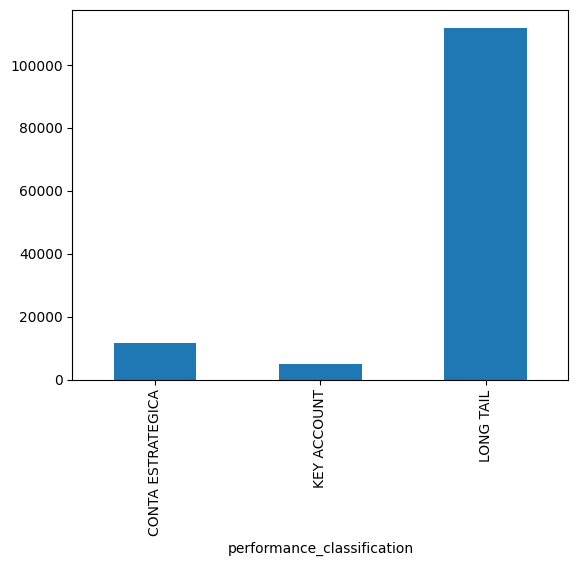

In [13]:
df.groupby('performance_classification').size().plot.bar()

In [14]:
df.groupby('business_model').size()

,0
business_model,
FULL_SERVICE,35673
MARKETPLACE,92930


<Axes: xlabel='business_model'>

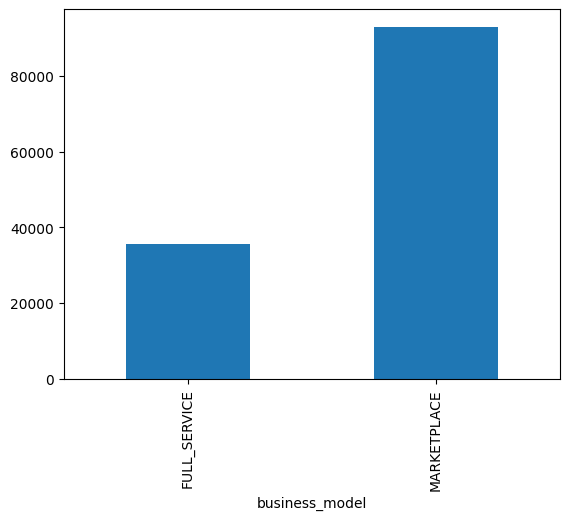

In [15]:
df.groupby('business_model').size().plot.bar()
# Distribuição coerente

## Dados numéricos

In [16]:
# Resumo estatístico
df['frn_id'].describe()

,frn_id
count,1.286030e+05
mean,2.392529e+06
std,8.035431e+05
min,3.340000e+03
25%,1.954210e+06
50%,2.593026e+06
75%,3.055216e+06
max,3.365166e+06


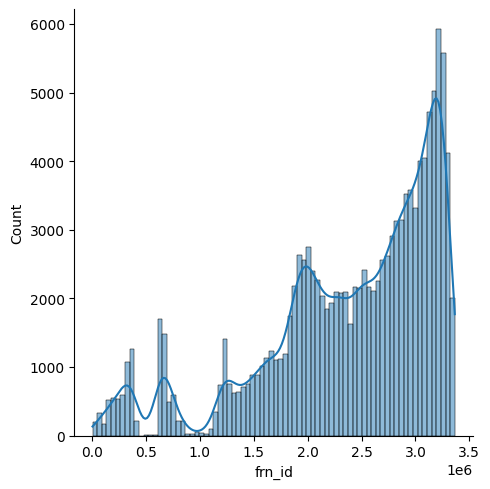

In [17]:
seab.displot(data=df,x='frn_id',kde=True)

In [18]:
df[df.duplicated(['reference_month','frn_id','group_name','performance_classification','business_model'],keep=False)]
# Existem diversas duplicatas dentro do mesmo mês com todos os valores categóricos iguais.

,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost
31105,2024-08-01,103039,SEM MARCA,CONTA ESTRATEGICA,FULL_SERVICE,8,667.97,110.92,110.92,132.04,0.00,0,18.37,-95.75,NaN
93007,2024-08-01,103039,SEM MARCA,CONTA ESTRATEGICA,MARKETPLACE,89,7828.16,941.53,941.53,703.62,8.91,0,177.07,-6.70,NaN
111954,2024-08-01,103039,SEM MARCA,CONTA ESTRATEGICA,FULL_SERVICE,19,1997.56,254.81,254.81,370.41,0.99,0,51.54,-225.05,NaN
118545,2024-08-01,103039,SEM MARCA,CONTA ESTRATEGICA,MARKETPLACE,239,19240.47,2354.39,2354.39,1977.82,6.93,0,480.44,-6.50,NaN
24349,2024-08-01,2064552,SEM MARCA,LONG TAIL,FULL_SERVICE,6,176.86,33.94,0.00,32.41,2.97,0,4.52,-35.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66033,2024-10-01,3274928,SEM MARCA,LONG TAIL,MARKETPLACE,88,3010.69,8.98,8.98,284.18,44.55,0,63.67,NaN,NaN
90662,2024-10-01,3298625,SEM MARCA,LONG TAIL,MARKETPLACE,297,8621.92,505.00,400.00,904.27,82.17,0,168.58,NaN,NaN
127958,2024-10-01,3298625,SEM MARCA,LONG TAIL,MARKETPLACE,29,665.20,6.00,6.00,79.89,1.98,0,15.31,NaN,NaN
11726,2024-10-01,3333059,SEM MARCA,LONG TAIL,MARKETPLACE,1,26.04,5.05,5.05,3.12,0.99,0,0.83,NaN,NaN


In [19]:
df['orders'].describe()

,orders
count,128603.000000
mean,130.420192
std,257.751108
min,1.000000
25%,12.000000
50%,44.000000
75%,143.000000
max,8995.000000


<Axes: xlabel='business_model', ylabel='orders'>

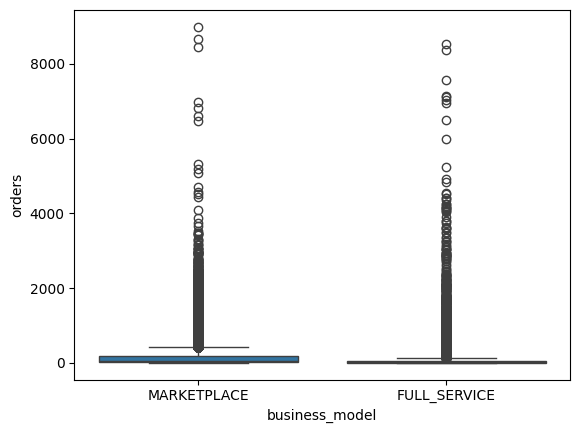

In [20]:
seab.boxplot(data=df,y='orders',x='business_model')

<Axes: xlabel='performance_classification', ylabel='orders'>

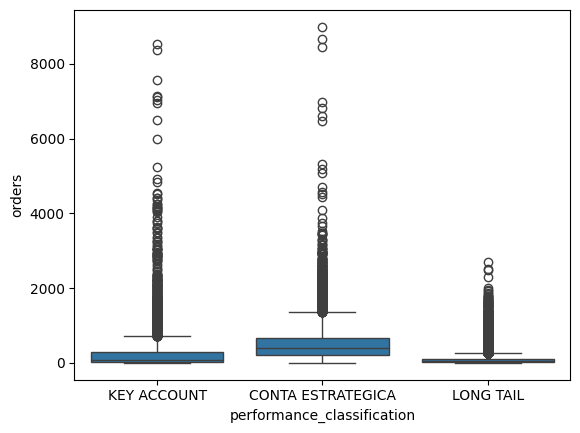

In [21]:
seab.boxplot(data=df,y='orders',x='performance_classification')

In [22]:
df['gmv_basket'].describe()

,gmv_basket
count,128603.000000
mean,6295.327149
std,14311.611402
min,0.010000
25%,502.000000
50%,1994.820000
75%,6570.020000
max,669023.160000


<Axes: xlabel='business_model', ylabel='gmv_basket'>

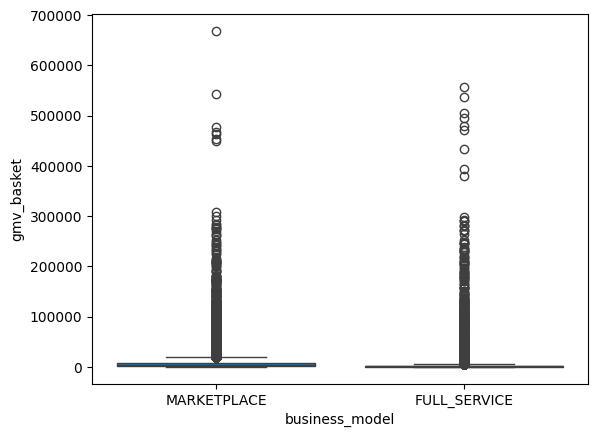

In [23]:
seab.boxplot(data=df,y='gmv_basket',x='business_model')

<Axes: xlabel='performance_classification', ylabel='gmv_basket'>

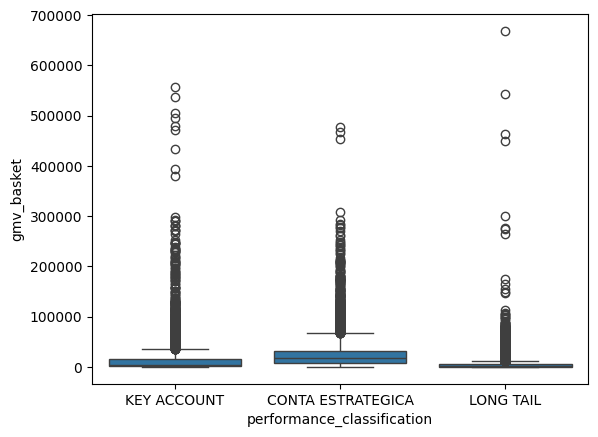

In [24]:
seab.boxplot(data=df,y='gmv_basket',x='performance_classification')

In [25]:
df['delivery_fee'].describe()

,delivery_fee
count,128603.000000
mean,590.675425
std,1493.435376
min,0.000000
25%,39.975000
50%,169.660000
75%,592.460000
max,88105.620000


<Axes: xlabel='business_model', ylabel='delivery_fee'>

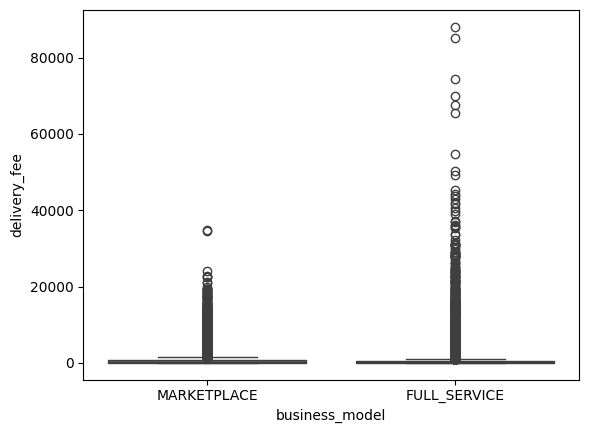

In [26]:
seab.boxplot(data=df,y='delivery_fee',x='business_model')

<Axes: xlabel='performance_classification', ylabel='delivery_fee'>

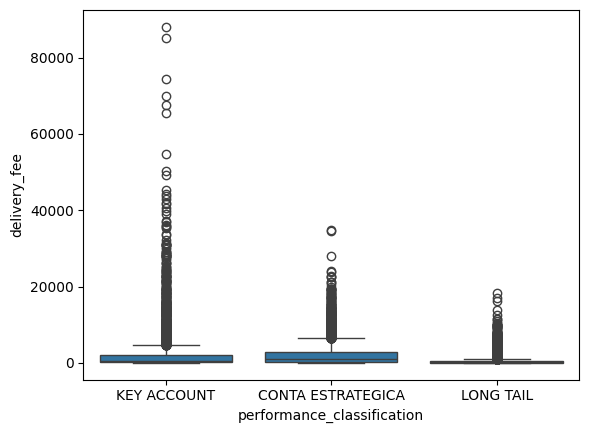

In [27]:
seab.boxplot(data=df,y='delivery_fee',x='performance_classification')

In [28]:
df['paid_delivery_fee'].describe()

,paid_delivery_fee
count,128603.000000
mean,496.565856
std,1328.297413
min,0.000000
25%,28.000000
50%,136.680000
75%,487.000000
max,83275.890000


<Axes: xlabel='business_model', ylabel='paid_delivery_fee'>

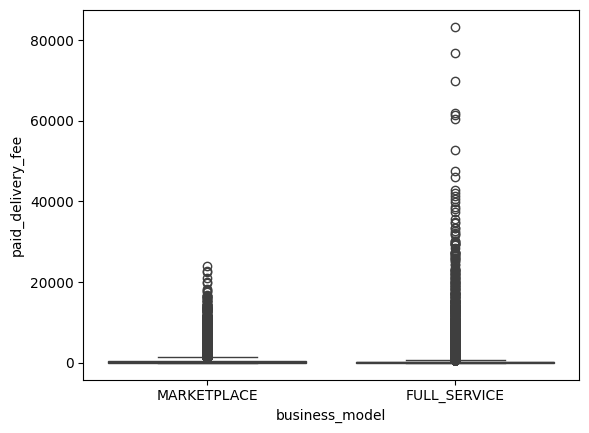

In [29]:
seab.boxplot(data=df,y='paid_delivery_fee',x='business_model')

<Axes: xlabel='performance_classification', ylabel='paid_delivery_fee'>

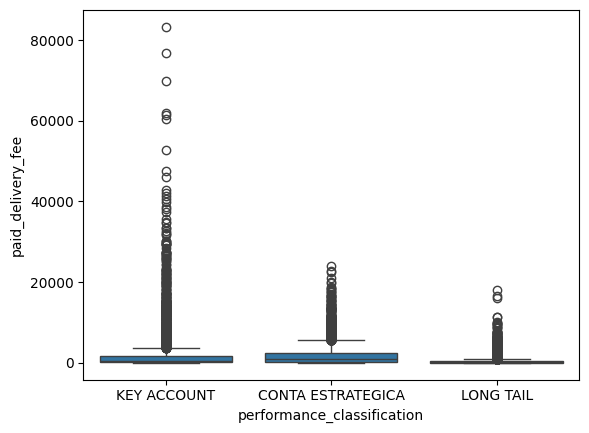

In [30]:
seab.boxplot(data=df,y='paid_delivery_fee',x='performance_classification')

In [31]:
df['commission'].describe()

,commission
count,128603.000000
mean,723.372471
std,1658.052306
min,0.000000
25%,51.480000
50%,228.580000
75%,764.460000
max,79304.970000


<Axes: xlabel='business_model', ylabel='commission'>

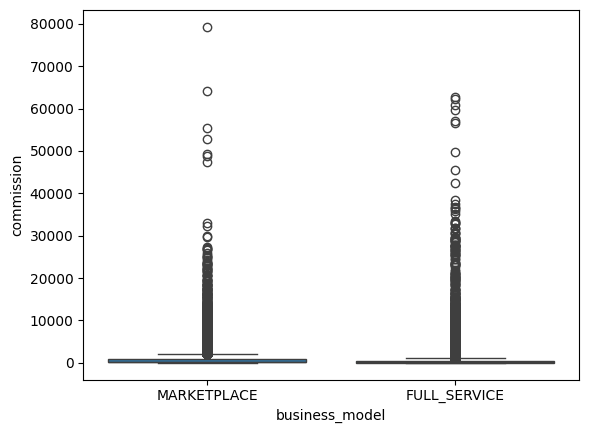

In [32]:
seab.boxplot(data=df,y='commission',x='business_model')

<Axes: xlabel='performance_classification', ylabel='commission'>

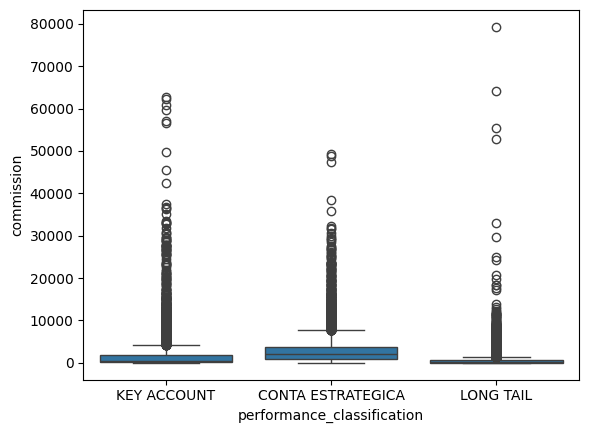

In [33]:
seab.boxplot(data=df,y='commission',x='performance_classification')

In [34]:
df['service_fee'].describe()

,service_fee
count,128603.000000
mean,24.462607
std,68.911039
min,0.000000
25%,0.000000
50%,2.970000
75%,18.810000
max,2740.320000


<Axes: xlabel='business_model', ylabel='service_fee'>

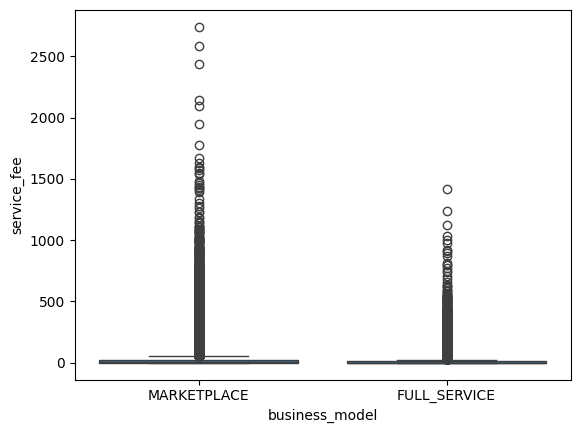

In [35]:
seab.boxplot(data=df,y='service_fee',x='business_model')

<Axes: xlabel='performance_classification', ylabel='service_fee'>

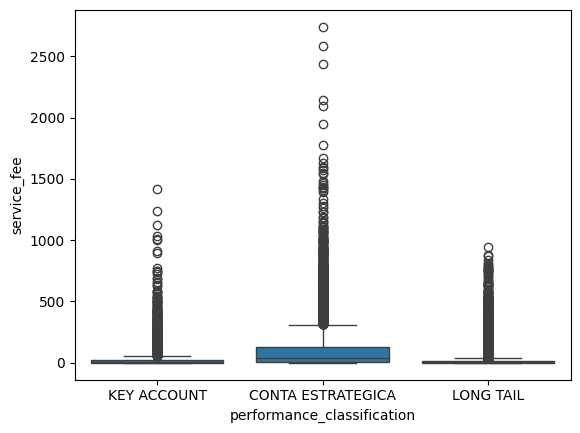

In [36]:
seab.boxplot(data=df,y='service_fee',x='performance_classification')

In [37]:
df['anticipation_fee'].describe()
# Valores completamente zerados. Coluna irrelevante neste contexto.

,anticipation_fee
count,128603.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [38]:
df['olp_fee'].describe()

,olp_fee
count,128603.000000
mean,144.127961
std,327.385254
min,0.000000
25%,9.800000
50%,44.880000
75%,151.610000
max,12842.990000


<Axes: xlabel='business_model', ylabel='olp_fee'>

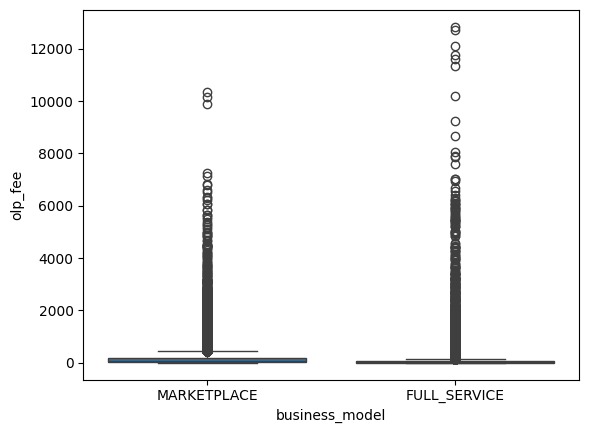

In [39]:
seab.boxplot(data=df,y='olp_fee',x='business_model')

<Axes: xlabel='performance_classification', ylabel='olp_fee'>

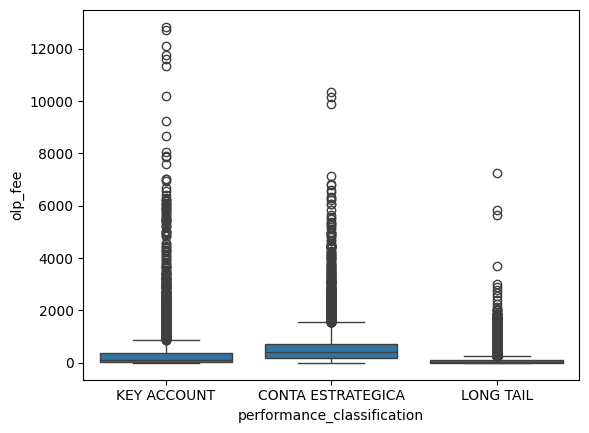

In [40]:
seab.boxplot(data=df,y='olp_fee',x='performance_classification')

In [41]:
df['delivery_cost'].describe()

,delivery_cost
count,39104.000000
mean,-532.577147
std,1723.574209
min,-68525.489067
25%,-438.720000
50%,-131.785000
75%,-38.870000
max,3.224573


<Axes: xlabel='business_model', ylabel='delivery_cost'>

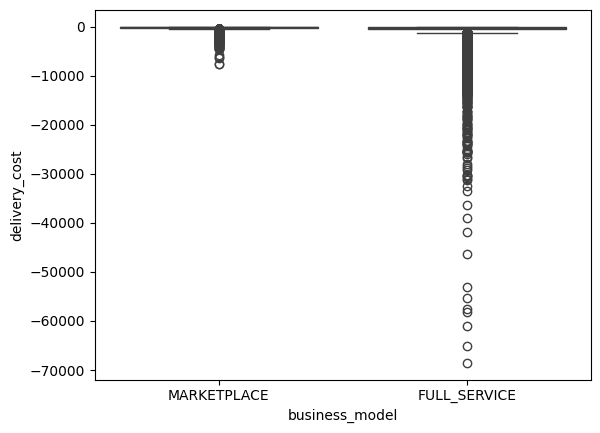

In [42]:
seab.boxplot(data=df,y='delivery_cost',x='business_model')

<Axes: xlabel='performance_classification', ylabel='delivery_cost'>

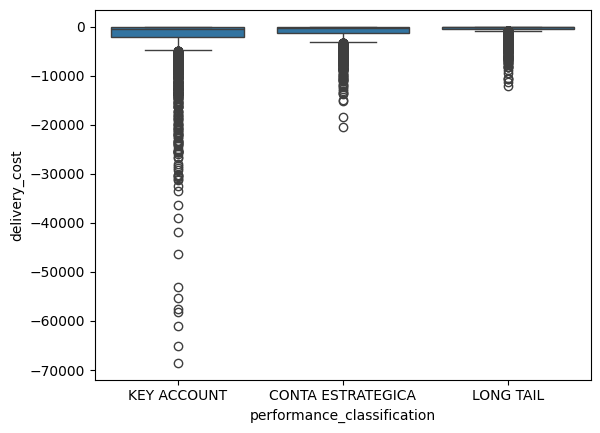

In [43]:
seab.boxplot(data=df,y='delivery_cost',x='performance_classification')

In [44]:
df.loc[df['delivery_cost'] >= 0]
# Um único valor positivo. Apesar de poder ser um crédito por algum motivo, o mais provável é ser um erro de sinal do valor.

,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost
59438,2024-09-01,3099547,SEM MARCA,LONG TAIL,FULL_SERVICE,14,541.29,93.86,0.0,25.03,0.0,0,3.48,3.224573,NaN


In [45]:
df['delivery_cost'].isna().sum()
# Muitos registros inválidos

89499

In [46]:
df['occurrences_cost'].describe()

,occurrences_cost
count,11213.000000
mean,-105.490083
std,429.407832
min,-16173.369011
25%,-79.703857
50%,-40.590770
75%,-22.831286
max,-0.181286


<Axes: xlabel='business_model', ylabel='occurrences_cost'>

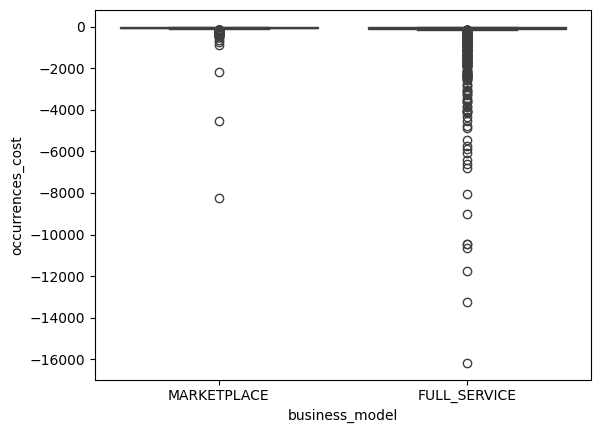

In [47]:
seab.boxplot(data=df,y='occurrences_cost',x='business_model')

<Axes: xlabel='performance_classification', ylabel='occurrences_cost'>

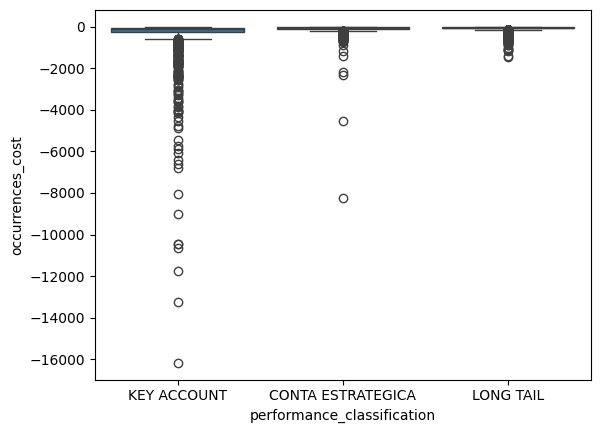

In [48]:
seab.boxplot(data=df,y='occurrences_cost',x='performance_classification')

In [49]:
df.loc[df['occurrences_cost'] >= 0]
# Não há valores positivos.

,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost


# Aplicação dos tratamentos

Dados categóricos e numéricos.

In [3]:
# Volta para o df original, caso necessário
df_formatado = df.copy()
df_formatado.shape
#df_formatado.head()

(128603, 15)

In [4]:
# Excluir coluna zerada 'anticipation_fee' e group_name que não parece ter muita relevância
df_formatado = df.drop(columns=['anticipation_fee','group_name'])
df_formatado.shape
#df_formatado.head()

(128603, 13)

In [5]:
'''Conforme alinhado via whatsapp com a Luiza (Tech Recruiter) e Augusto (representante da área), no dia 03/02 as 14:30:
 O restaurante (FRN_ID) pode se repetir em meses diferentes, desde que com com valores únicos nas outras dimensões.
 No caso de haver repetição entre todas as colunas categóricas, devo desconsiderar pois é um erro na geração da base fictícia.'''

# Mantendo apenas o primeiro registro dos restaurantes identificados previamente como duplicados
df_formatado.drop_duplicates(subset=['reference_month','frn_id','performance_classification','business_model'],keep='first',inplace=True)
df_formatado.shape

(128568, 13)

In [10]:
# Não utilizei, então excluí ela acima.

# Agrupando marcas "ZZ" e "QUQU" em "SEM MARCA"
#df_formatado.loc[(df_formatado['group_name'] == 'ZZ') | (df_formatado['group_name'] == 'QUQU'), 'group_name'] = 'SEM MARCA'

In [6]:
# Agrupar 'CONTA ESTRATEGICA' dentro do padrão 'KEY ACCOUNT'.
df_formatado.loc[df_formatado['performance_classification'] == 'CONTA ESTRATEGICA', 'performance_classification'] = 'KEY ACCOUNT'

In [7]:
# Substituir valor positivo em coluna de custo
df_formatado.loc[df_formatado['delivery_cost'] >= 0, 'delivery_cost'] *= -1

In [8]:
# Tratando valores NA nas colunas delivery_cost e occurrences_cost
# Como são colunas de custos e a ocorrência de NA é muito grande, acredito ser mais coerente tratar dados NA como 0 (zero) do que preencher com alguma média/mediana.

df_formatado.fillna({'delivery_cost':0}, inplace=True)
df_formatado.fillna({'occurrences_cost':0}, inplace=True)

In [58]:
df_formatado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.00,0.0
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.00,0.0
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0.00,0.00,0.0
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,84.30,-123.57,0.0
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,1586.67,-99.35,0.0


# Criando novas colunas

In [9]:
# Receita total da empresa em cima de todos os valores recebidos do restaurante
df_formatado['net_revenue'] = df_formatado['commission'] + df_formatado['service_fee'] + df_formatado['olp_fee']
df_formatado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.00,0.0,5915.30
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.00,0.0,6894.63
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0.00,0.00,0.0,7.08
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,84.30,-123.57,0.0,473.34
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,1586.67,-99.35,0.0,10112.68


In [10]:
# Margem bruta de lucro. Apenas somar, pois colunas de custos já têm valor negativo.
df_formatado['gross_margin'] = df_formatado['net_revenue'] + df_formatado['delivery_cost'] + df_formatado['occurrences_cost']
df_formatado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.00,0.0,5915.30,5915.30
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.00,0.0,6894.63,6894.63
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0.00,0.00,0.0,7.08,7.08
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,84.30,-123.57,0.0,473.34,349.77
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,1586.67,-99.35,0.0,10112.68,10013.33


In [11]:
# Calcula o AOV e cria nova coluna
df_formatado['aov'] = (df_formatado['gmv_basket'] + df_formatado['paid_delivery_fee']) / df_formatado['orders']
df_formatado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.00,0.0,5915.30,5915.30,63.020936
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.00,0.0,6894.63,6894.63,90.714613
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0.00,0.00,0.0,7.08,7.08,73.000000
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,84.30,-123.57,0.0,473.34,349.77,86.945102
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,1586.67,-99.35,0.0,10112.68,10013.33,50.061791


# Análise histórica do comissionamento

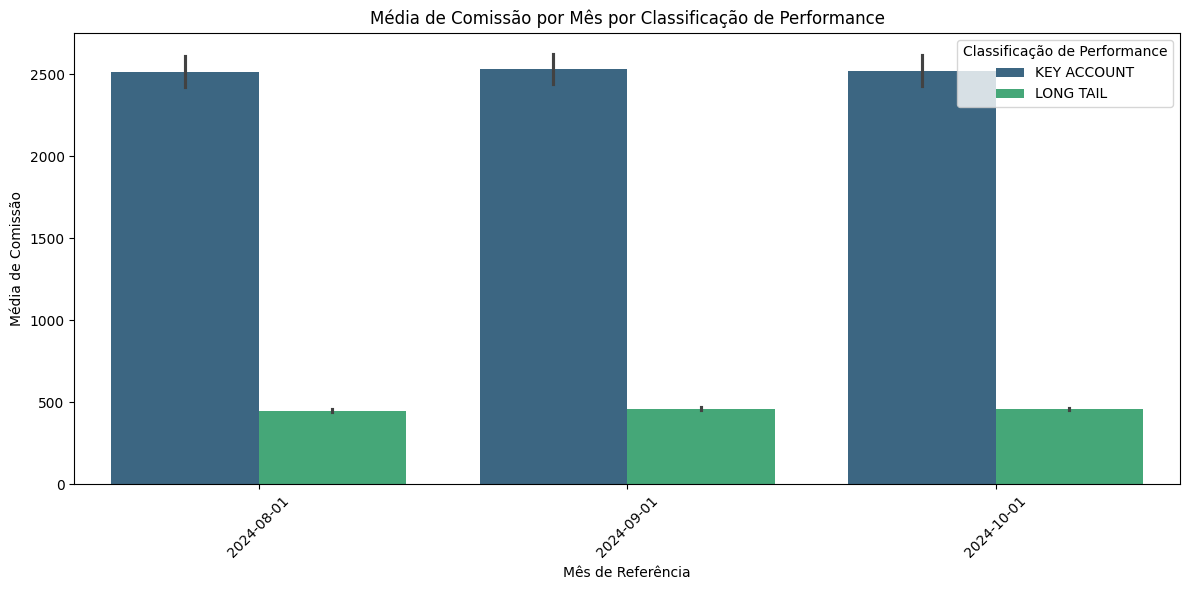

In [14]:
# Criando DF usado nos gráficos
grouped_df = df_formatado.groupby(['reference_month', 'frn_id', 'performance_classification', 'business_model'])['commission'].agg(['mean', 'sum']).reset_index()
grouped_df.rename(columns={'mean': 'mean_commission', 'sum': 'total_commission'}, inplace=True)

# Análise histórica por Performance Classification (PC)
plt.figure(figsize=(12, 6))
seab.barplot(data=grouped_df, x='reference_month', y='mean_commission', hue='performance_classification', palette='viridis')
plt.title('Média de Comissão por Mês por Classificação de Performance')
plt.ylabel('Média de Comissão')
plt.xlabel('Mês de Referência')
plt.xticks(rotation=45)
plt.legend(title='Classificação de Performance')
plt.tight_layout()
plt.show()

# Insights:
# Key Accounts pagam aproximadamente 5x mais comissão por mês do que Long Tails

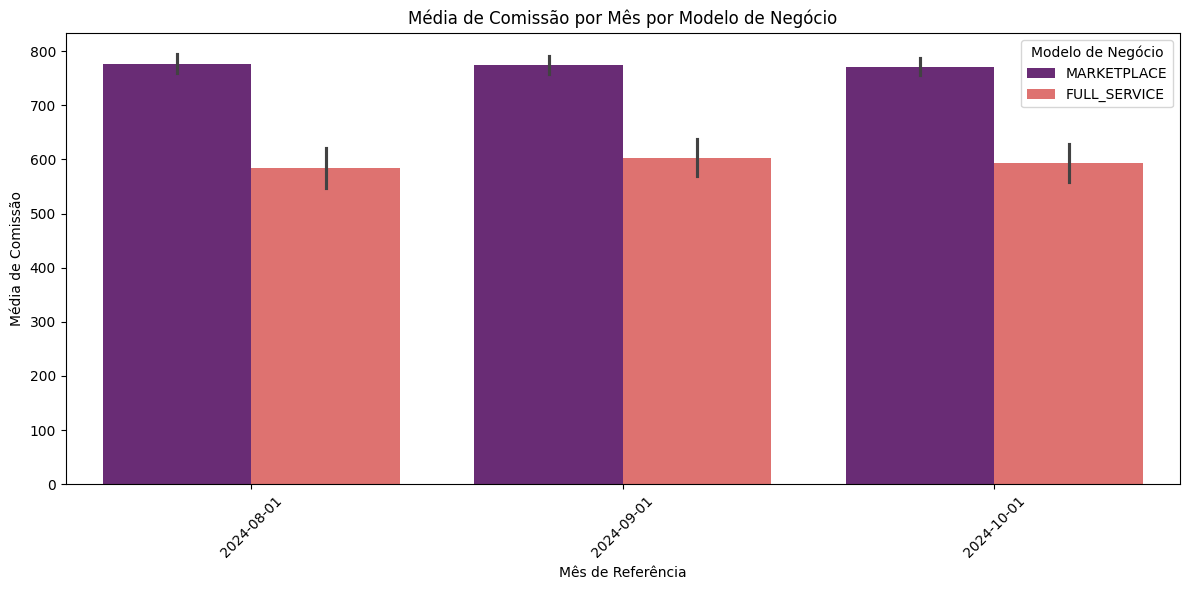

In [15]:
# Análise histórica Business Model (BM)
plt.figure(figsize=(12, 6))
seab.barplot(data=grouped_df, x='reference_month', y='mean_commission', hue='business_model', palette='magma')
plt.title('Média de Comissão por Mês por Modelo de Negócio')
plt.ylabel('Média de Comissão')
plt.xlabel('Mês de Referência')
plt.xticks(rotation=45)
plt.legend(title='Modelo de Negócio')
plt.tight_layout()
plt.show()

# Insights:
# Todavia, o modelo de negócio que mais contribui com comissão é MARKETPLACE

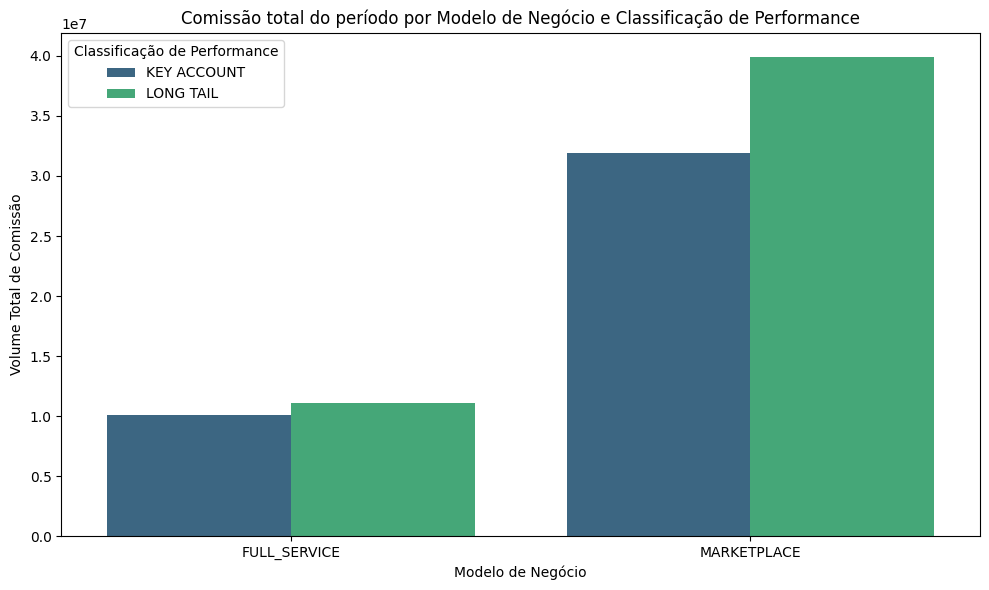

In [77]:
# Agrupar os dados para calcular o total de comissão por BM e PC
total_commission_df = df_formatado.groupby(['business_model', 'performance_classification'])['commission'].sum().reset_index()

# Exibir os resultados da análise
#total_commission_df.head()

# Criar gráfico de barras: concentração de comissão por BM e PC
plt.figure(figsize=(10, 6))
seab.barplot(data=total_commission_df, x='business_model', y='commission', hue='performance_classification', palette='viridis')
plt.title('Comissão total do período por Modelo de Negócio e Classificação de Performance')
plt.ylabel('Volume Total de Comissão')
plt.xlabel('Modelo de Negócio')
plt.legend(title='Classificação de Performance')
plt.tight_layout()
plt.show()

# E no período inteiro, Long Tails no modelo Marketplace contribuem muito mais.

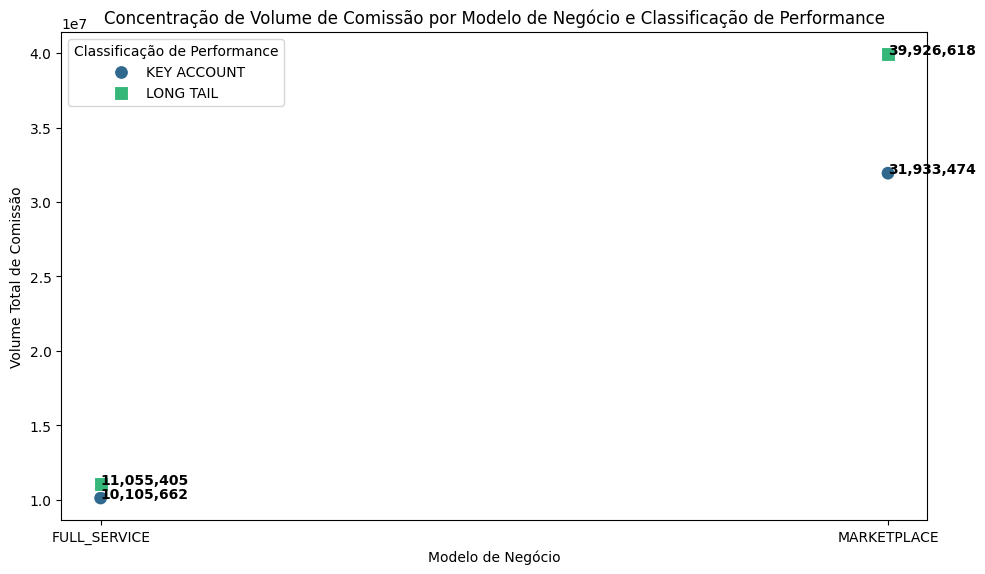

In [18]:
# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
seab.scatterplot(data=total_commission_df,
                 x='business_model',
                 y='commission',
                 hue='performance_classification',
                 style='performance_classification',
                 s=100,  # Tamanho dos marcadores
                 palette='viridis',
                 markers=["o", "s"])  # Diferentes marcadores para cada classificação

# Adicionar os rótulos da comissão ao gráfico
for line in range(0, total_commission_df.shape[0]):
    plt.text(total_commission_df['business_model'][line],
             total_commission_df['commission'][line],
             f"{total_commission_df['commission'][line]:,.0f}",
             horizontalalignment='left',
             size='medium',
             color='black',
             weight='semibold')

plt.title('Concentração de Volume de Comissão por Modelo de Negócio e Classificação de Performance')
plt.ylabel('Volume Total de Comissão')
plt.xlabel('Modelo de Negócio')
plt.legend(title='Classificação de Performance')
plt.tight_layout()
plt.show()

# Insights:
# Podemos ver aqui que temos muitos restaurantes concentrados no modelo MARKETPLACE.
# Se analisarmos todas suas características, poderá existir a possibilidade de reclassificação?
# Por isso utilizamos um modelo matemático para levar vários dados em conta para essa classificação (inclusive o AOV).


# Usando Regressão Logística Múltipla para reclassificar a performance dos restaurantes

In [19]:
df_formatado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.00,0.0,5915.30,5915.30,63.020936
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.00,0.0,6894.63,6894.63,90.714613
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0.00,0.00,0.0,7.08,7.08,73.000000
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,84.30,-123.57,0.0,473.34,349.77,86.945102
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,1586.67,-99.35,0.0,10112.68,10013.33,50.061791


In [99]:
df_formatado.shape

(128568, 16)

In [20]:
# Definição das variáveis independentes (X) e da varivável de previsão (y)
previsores = df_formatado.iloc[:,3:].values
previsores
classe = df_formatado.iloc[:,2].values
classe

array(['KEY ACCOUNT', 'KEY ACCOUNT', 'LONG TAIL', ..., 'LONG TAIL',
       'LONG TAIL', 'LONG TAIL'], dtype=object)

In [21]:
# Transformando atributo categórico em numérico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])

In [22]:
# Separando a base de treinamento (70%) e teste (30%) para o modelo
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)

In [23]:
# Treina V1 do modelo
# Recebi um warning que o modelo não convergiu por ter atingido o limite de iterações. O max_iter atual foi o melhor valor que consegui sem atingir o limite
modelo = LogisticRegression(max_iter=1410)
modelo.fit(X_treinamento, y_treinamento) # ~18segs

LogisticRegression(max_iter=1410)

In [24]:
previsoes_v1 = modelo.predict(X_teste)
previsoes_v1

array(['LONG TAIL', 'LONG TAIL', 'LONG TAIL', ..., 'LONG TAIL',
       'LONG TAIL', 'LONG TAIL'], dtype=object)

In [25]:
# Testando acurácia da V1
acertos = accuracy_score(y_teste, previsoes_v1)
acertos

0.8986025770656711

In [26]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes para uma V2
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

array([0.00345236, 0.12496356, 0.09317436, 0.08799079, 0.09483382,
       0.1029304 , 0.06621149, 0.11137368, 0.03496238, 0.01660437,
       0.10309185, 0.08607685, 0.0743341 ])

In [27]:
# Mapeando colunas para facilitar a entender as mais importantes
colunas = ['business_model', 'orders', 'gmv_basket', 'delivery_fee', 'paid_delivery_fee',
           'commission', 'service_fee', 'olp_fee', 'delivery_cost', 'occurrences_cost','net_revenue','gross_margin','aov']

# Criar um df para facilitar a manipulação
importancias_df = pd.DataFrame({'coluna': colunas, 'importancia': importancias})

# Ordenar o DataFrame pela importância
importancias_df = importancias_df.sort_values(by='importancia', ascending=False).reset_index()

importancias_df

,index,coluna,importancia
0,1,orders,0.124964
1,7,olp_fee,0.111374
2,10,net_revenue,0.103092
3,5,commission,0.102930
4,4,paid_delivery_fee,0.094834
5,2,gmv_basket,0.093174
6,3,delivery_fee,0.087991
7,11,gross_margin,0.086077
8,12,aov,0.074334
9,6,service_fee,0.066211


In [28]:
# Utilizando somente as colunas mais importantes para treino
X_treinamento_importance = X_treinamento[:,[1,7,2,10,5,4,3,11,12]]
X_treinamento_importance
X_teste2_importance = X_teste[:,[1,7,2,10,5,4,3,11,12]]
X_teste2_importance

array([[38, 58.53, 2604.97999999999, ..., 426.0, 337.69000000000005,
        79.76263157894711],
       [19, 12.39, 651.5, ..., 135.0, 75.0699999999999,
        41.39473684210526],
       [3, 0.0, 116.5, ..., 12.97, 0.0, 43.156666666666666],
       ...,
       [24, 22.5799999999999, 954.0, ..., 186.0, 126.2599999999989, 47.5],
       [14, 17.38, 795.199999999999, ..., 93.0, 90.14, 56.79999999999993],
       [2, 0.0, 75.6999999999999, ..., 12.0, 0.0, 37.84999999999995]],
      dtype=object)

In [31]:
# Treino o modelo novamente
modelo_v2 = LogisticRegression(max_iter=460) # com colunas otimizadas foram necessárias 3x menos iterações e tempo de treinamento caiu ~55%.
modelo_v2.fit(X_treinamento_importance, y_treinamento) # ~9segs

LogisticRegression(max_iter=460)

In [32]:
# executo a predição do modelo v2
previsoes_v2 = modelo_v2.predict(X_teste2_importance)
previsoes_v2

array(['LONG TAIL', 'LONG TAIL', 'LONG TAIL', ..., 'LONG TAIL',
       'LONG TAIL', 'LONG TAIL'], dtype=object)

In [33]:
# Testando acurácia da V2 e comparando
acertos_v2 = accuracy_score(y_teste, previsoes_v2)
print(f'Acurácia Modelo V1: {acertos*100:.2f}%')
print(f'Acurácia Modelo V2: {acertos_v2*100:.2f}%')
print(f'Diferença da V2 para V1: {((acertos_v2/acertos)-1)*100:.2f}%')
print('Praticamente sem perda de acurácia e o modelo ficou mais otimizado e rápido!')

Acurácia Modelo V1: 89.86%
Acurácia Modelo V2: 89.83%
Diferença da V2 para V1: -0.03%
Praticamente sem perda de acurácia e o modelo ficou mais otimizado e rápido!


### Aplicando modelo pronto da Regressão Logística

In [78]:
df_formatado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov,predicted_performance
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.00,0.0,5915.30,5915.30,63.020936,KEY ACCOUNT
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.00,0.0,6894.63,6894.63,90.714613,KEY ACCOUNT
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0.00,0.00,0.0,7.08,7.08,73.000000,LONG TAIL
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,84.30,-123.57,0.0,473.34,349.77,86.945102,LONG TAIL
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,1586.67,-99.35,0.0,10112.68,10013.33,50.061791,KEY ACCOUNT


In [35]:
#bkp
df_copy = df_formatado
# Executa o predição
predicted_performance = modelo_v2.predict(df_formatado.iloc[:,[4,10,5,13,8,7,6,14,15]].values)
df_formatado['predicted_performance'] = predicted_performance
df_formatado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov,predicted_performance
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.00,0.0,5915.30,5915.30,63.020936,KEY ACCOUNT
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.00,0.0,6894.63,6894.63,90.714613,KEY ACCOUNT
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0.00,0.00,0.0,7.08,7.08,73.000000,LONG TAIL
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,84.30,-123.57,0.0,473.34,349.77,86.945102,LONG TAIL
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,1586.67,-99.35,0.0,10112.68,10013.33,50.061791,KEY ACCOUNT


In [74]:
# CONTAR DIFERENÇAS DE CLASSIFICAÇÃO DA COLUNA ORIGINAL VS PREDITA
lt_size = df_formatado.loc[df_formatado['performance_classification'] == 'LONG TAIL'].shape[0]
p_lt_size = df_formatado.loc[df_formatado['predicted_performance'] == 'LONG TAIL'].shape[0]
ka_size = df_formatado.loc[df_formatado['performance_classification'] == 'KEY ACCOUNT'].shape[0]
p_ka_size = df_formatado.loc[df_formatado['predicted_performance'] == 'KEY ACCOUNT'].shape[0]
print(f'{lt_size=}')
print(f'{p_lt_size=}')
print(f'{ka_size=}')
print(f'{p_ka_size=}')
print(f'Novo LT mudou em {p_lt_size-lt_size} unidades: {(p_lt_size/lt_size-1)*100:.2f}%')
print(f'Novo KA mudou em {p_ka_size-ka_size} unidades: {(p_ka_size/ka_size-1)*100:.2f}%') # só para garantir que é igual
print('+9k restaurantes foram reclassificados de Key Account para Long Tail.')

lt_size=111889
p_lt_size=121256
ka_size=16679
p_ka_size=7312
Novo LT mudou em 9367 unidades: 8.37%
Novo KA mudou em -9367 unidades: -56.16%
+9k restaurantes foram reclassificados de Key Account para Long Tail.


**Agora os restaurantes *KEY ACCOUNTS* são considerados os clientes com a melhor combinação de "orders,	olp_fee,	gmv_basket,	net_revenue,	commission,	paid_delivery_fee,	delivery_fee,	gross_margin,	aov"**

# Criando modelos de Predição de Receita a partir de parâmetros

In [37]:
# BKP
novo_df = df_formatado.copy()
novo_df.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov,predicted_performance
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.00,0.0,5915.30,5915.30,63.020936,KEY ACCOUNT
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.00,0.0,6894.63,6894.63,90.714613,KEY ACCOUNT
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.08,0.00,0.00,0.00,0.0,7.08,7.08,73.000000,LONG TAIL
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,389.04,0.00,84.30,-123.57,0.0,473.34,349.77,86.945102,LONG TAIL
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.39,136.62,1586.67,-99.35,0.0,10112.68,10013.33,50.061791,KEY ACCOUNT


### Regressão Linear Simples

In [111]:
# testando força de correlação de algumas variáveis
a = np.corrcoef(df_formatado['orders'], df_formatado['net_revenue']) #88,96
b = np.corrcoef(df_formatado['gmv_basket'], df_formatado['net_revenue']) #97,92
c = np.corrcoef(df_formatado['delivery_fee'], df_formatado['net_revenue']) #81.52
d = np.corrcoef(df_formatado['paid_delivery_fee'], df_formatado['net_revenue']) #78.74
e = np.corrcoef(df_formatado['commission'], df_formatado['net_revenue']) #99.81 => Selecionada!
e

array([[1.        , 0.99819558],
       [0.99819558, 1.        ]])

In [149]:
# Define X e y
X = df_formatado[['commission']].values
X
y = df_formatado['net_revenue'].values
y

array([5.91530e+03, 6.89463e+03, 7.08000e+00, ..., 6.81000e+00,
       4.66000e+00, 5.50000e+00])

In [150]:
# Divide base de treino
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,
                                                                  y,
                                                                  test_size = 0.3,
                                                                  random_state = 1)

In [151]:
# Treina o modelo
modelo = LinearRegression()
modelo.fit(X_treinamento, y_treinamento)

LinearRegression()

In [152]:
previsoes = modelo.predict(X_teste)
previsoes

array([355.21844584, 103.22718273,  21.82017229, ..., 146.52878403,
       109.3375198 ,  21.82017229])

R²: 0.9972801253040326


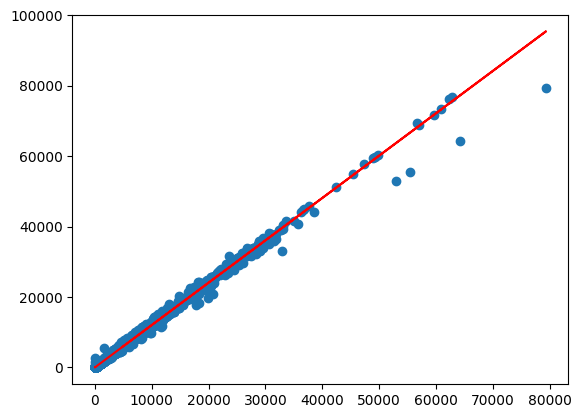

In [43]:
# Avaliando performance do modelo
r2 = r2_score(y_teste, previsoes)
print(f"R²: {r2}")

plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

R²: 0.9465997931902677


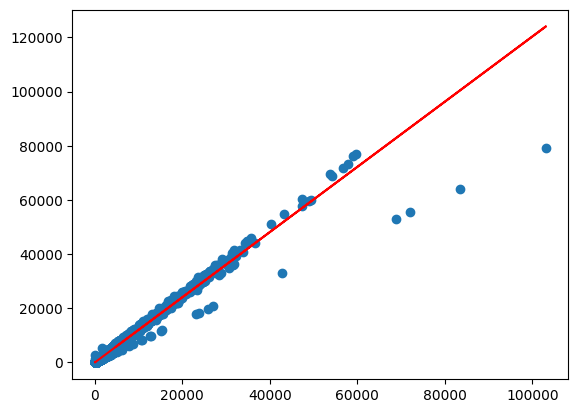

In [153]:
# Algoritmo de Predição da Receita aplicando a lógica dos parâmetros
# Parametros
novo_df = df_formatado.copy() # bkp
reduction_full_service = 5 # valor em % de desconto
increase_marketplace = 30 # valor em % do aumento

# DF que vai receber as mudanças
df_simulado = novo_df.copy()
# Aplicar mudanças nas comissões
if reduction_full_service >= 0 and increase_marketplace >= 0:
  # Desconto para KEY ACCOUNTs no modelo FULL_SERVICE
  df_simulado.loc[(df_simulado['business_model'] == 'FULL_SERVICE') & (df_simulado['predicted_performance'] == 'KEY ACCOUNT'), 'commission'] *= (1 - reduction_full_service / 100)
  # Desconto para clientes no modelo MARKETPLACE que NÃO são KEY ACCOUNTs
  df_simulado.loc[(df_simulado['business_model'] == 'MARKETPLACE') & (df_simulado['predicted_performance'] == 'LONG TAIL'), 'commission'] *= (1 + increase_marketplace / 100)
  # Se o cliente é MARKETPLACE, mas é KEY ACC., ele não recebe desconto, mas tbm não recebe aumento de preço na comissão.
else:
  raise exception('Só são permitidos números positivos. Use 0 (zero) para manter valores originais de comissão para o modelo de negócio.')

X = df_simulado[['commission']].values
y = df_simulado['net_revenue'].values

previsoes = modelo.predict(X)
# Adiciona a previsão no df
df_simulado['predicted_revenue'] = previsoes
# Adiciona Comissão original ao df simulado
df_simulado['original_commission'] = df_formatado['commission']

r2 = r2_score(X, previsoes)
print(f"R²: {r2}")

plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [97]:
df_simulado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov,predicted_performance,predicted_revenue,original_commission,predicted_business_model
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.530,184.14,904.63,0.00,0.0,5915.30,5915.30,63.020936,KEY ACCOUNT,5827.277887,4826.53,MARKETPLACE
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.470,0.00,1233.16,0.00,0.0,6894.63,6894.63,90.714613,KEY ACCOUNT,6831.562303,5661.47,MARKETPLACE
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,7.788,0.00,0.00,0.00,0.0,7.08,7.08,73.000000,LONG TAIL,31.187752,7.08,MARKETPLACE
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,427.944,0.00,84.30,-123.57,0.0,473.34,349.77,86.945102,LONG TAIL,536.560741,389.04,MARKETPLACE
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.390,136.62,1586.67,-99.35,0.0,10112.68,10013.33,50.061791,KEY ACCOUNT,10112.765198,8389.39,MARKETPLACE


# Reclassificar Business Model para entender impacto de possíveis transições entre Long Tail e Full_Service

In [41]:
df_simulado.head(2)

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov,predicted_performance,predicted_revenue,original_commission
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.0,0.0,5915.30,5915.30,63.020936,KEY ACCOUNT,5827.277887,4826.53
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.0,0.0,6894.63,6894.63,90.714613,KEY ACCOUNT,6831.562303,5661.47


In [155]:
# Definição das variáveis independentes (X) e da varivável de previsão (y)
previsores = df_simulado.iloc[:,4:].values
previsores
classe = df_formatado.iloc[:,3].values
classe


array(['MARKETPLACE', 'MARKETPLACE', 'MARKETPLACE', ..., 'FULL_SERVICE',
       'FULL_SERVICE', 'MARKETPLACE'], dtype=object)

In [136]:
df_simulado.iloc[:,4:].head()

,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov,predicted_performance,predicted_revenue,original_commission
40600,780,44759.67,4672.2,4396.66,4826.530,184.14,904.63,0.00,0.0,5915.30,5915.30,63.020936,KEY ACCOUNT,5827.277887,4826.53
84499,594,50854.48,3761.0,3030.00,5661.470,0.00,1233.16,0.00,0.0,6894.63,6894.63,90.714613,KEY ACCOUNT,6831.562303,5661.47
114105,2,126.00,20.0,20.00,8.496,0.00,0.00,0.00,0.0,7.08,7.08,73.000000,LONG TAIL,32.039350,7.08
124306,49,4180.31,80.0,80.00,466.848,0.00,84.30,-123.57,0.0,473.34,349.77,86.945102,LONG TAIL,583.355338,389.04
40893,1675,81340.50,2513.0,2513.00,8389.390,136.62,1586.67,-99.35,0.0,10112.68,10013.33,50.061791,KEY ACCOUNT,10112.765198,8389.39


In [156]:
# Transformando atributo categórico em numérico
labelencoder = LabelEncoder()
previsores[:,12] = labelencoder.fit_transform(previsores[:,12])
previsores[:,12]

array([0, 0, 1, ..., 1, 1, 1], dtype=object)

In [157]:
# Separando a base de treinamento (70%) e teste (30%) para o modelo
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)

In [158]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

array([0.03101982, 0.06563244, 0.04476043, 0.02669968, 0.0438609 ,
       0.00940516, 0.04743447, 0.37227755, 0.03065108, 0.04729963,
       0.13301908, 0.02328288, 0.00373402, 0.03904802, 0.08187485])

In [54]:
# Mapeando colunas para facilitar a entender as mais importantes

colunas = ['orders', 'gmv_basket', 'delivery_fee', 'paid_delivery_fee', 'commission',
           'service_fee', 'olp_fee', 'delivery_cost', 'occurrences_cost', 'net_revenue',
           'gross_margin','aov','predicted_performance', 'predicted_revenue','original_commission']

# Criar um df para facilitar a manipulação
importancias_df = pd.DataFrame({'coluna': colunas, 'importancia': importancias})

# Ordenar o DataFrame pela importância
importancias_df = importancias_df.sort_values(by='importancia', ascending=False).reset_index()

importancias_df

,index,coluna,importancia
0,7,delivery_cost,0.395465
1,10,gross_margin,0.135467
2,1,gmv_basket,0.072308
3,6,olp_fee,0.061752
4,14,original_commission,0.051925
5,2,delivery_fee,0.044155
6,0,orders,0.040666
7,13,predicted_revenue,0.034509
8,4,commission,0.033976
9,9,net_revenue,0.033233


In [159]:
# Utilizando somente as colunas mais importantes para treino
X_treinamento_importance = X_treinamento[:,[7,1,6,2,13,4]]
X_treinamento_importance
X_teste_importance = X_teste[:,[7,1,6,2,13,4]]
X_teste_importance

array([[0.0, 2604.97999999999, 58.53, 426.0, 455.2379279016658, 360.334],
       [-13.91, 651.5, 12.39, 135.0, 127.6492858596165,
        87.98399999999987],
       [0.0, 116.5, 0.0, 12.97, 21.82017228727352, 0.0],
       ...,
       [0.0, 954.0, 22.5799999999999, 186.0, 183.94136754703166,
        134.7839999999987],
       [0.0, 795.199999999999, 17.38, 93.0, 135.59272405328545,
        94.58800000000001],
       [0.0, 75.6999999999999, 0.0, 12.0, 21.82017228727352, 0.0]],
      dtype=object)

In [160]:
# Treina V1 do modelo
modelo = LogisticRegression()
modelo.fit(X_treinamento_importance, y_treinamento)

LogisticRegression()

In [161]:
previsoes_v1 = modelo.predict(X_teste_importance)
previsoes_v1

# Testando acurácia da V1
acertos = accuracy_score(y_teste, previsoes_v1)
acertos

0.9365326281403127

In [162]:
# Aplicando dados oficiais no modelo
X = df_simulado[['delivery_cost','gmv_basket','olp_fee','delivery_fee','predicted_revenue','commission']].values
X
p_bizmodel = modelo.predict(X)
p_bizmodel

array(['MARKETPLACE', 'MARKETPLACE', 'MARKETPLACE', ..., 'MARKETPLACE',
       'MARKETPLACE', 'MARKETPLACE'], dtype=object)

In [163]:
# Adiciona previsão no DF simulado
df_simulado['predicted_business_model'] = p_bizmodel
df_simulado.head()

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov,predicted_performance,predicted_revenue,original_commission,predicted_business_model
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.530,184.14,904.63,0.00,0.0,5915.30,5915.30,63.020936,KEY ACCOUNT,5827.277887,4826.53,MARKETPLACE
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.470,0.00,1233.16,0.00,0.0,6894.63,6894.63,90.714613,KEY ACCOUNT,6831.562303,5661.47,MARKETPLACE
114105,2024-08-01,21722,LONG TAIL,MARKETPLACE,2,126.00,20.0,20.00,9.204,0.00,0.00,0.00,0.0,7.08,7.08,73.000000,LONG TAIL,32.890948,7.08,MARKETPLACE
124306,2024-08-01,21972,LONG TAIL,MARKETPLACE,49,4180.31,80.0,80.00,505.752,0.00,84.30,-123.57,0.0,473.34,349.77,86.945102,LONG TAIL,630.149935,389.04,MARKETPLACE
40893,2024-08-01,22445,KEY ACCOUNT,MARKETPLACE,1675,81340.50,2513.0,2513.00,8389.390,136.62,1586.67,-99.35,0.0,10112.68,10013.33,50.061791,KEY ACCOUNT,10112.765198,8389.39,MARKETPLACE


In [164]:
# CONTAR DIFERENÇAS DE CLASSIFICAÇÃO DA COLUNA ORIGINAL VS PREDITA
mktp = df_simulado.loc[df_simulado['business_model'] == 'MARKETPLACE'].shape[0]
p_mktp = df_simulado.loc[df_simulado['predicted_business_model'] == 'MARKETPLACE'].shape[0]
fserv = df_simulado.loc[df_simulado['business_model'] == 'FULL_SERVICE'].shape[0]
p_fserv = df_simulado.loc[df_simulado['predicted_business_model'] == 'FULL_SERVICE'].shape[0]
print(f'{mktp=}')
print(f'{p_mktp=}')
print(f'{fserv=}')
print(f'{p_fserv=}')
print(f'Novo MKTPLACE mudou em: {p_mktp-mktp} unidades: {(p_mktp/mktp-1)*100:.2f}%')
print(f'Novo FULL SERVICE mudou em: {p_fserv-fserv} unidades: {(p_fserv/fserv-1)*100:.2f}%') # só para garantir que é igual

mktp=92904
p_mktp=99320
fserv=35664
p_fserv=29248
Novo MKTPLACE mudou em: 6416 unidades: 6.91%
Novo FULL SERVICE mudou em: -6416 unidades: -17.99%


In [165]:
# Diferenças de Receita após o novo business_model predito
fs_rev = df_simulado.loc[df_simulado['predicted_business_model'] == 'FULL_SERVICE', 'net_revenue'].sum() # original
p_fs_rev = df_simulado.loc[df_simulado['predicted_business_model'] == 'FULL_SERVICE', 'predicted_revenue'].sum() # predição
mktp_rev = df_simulado.loc[df_simulado['predicted_business_model'] == 'MARKETPLACE', 'net_revenue'].sum()
p_mktp_rev = df_simulado.loc[df_simulado['predicted_business_model'] == 'MARKETPLACE', 'predicted_revenue'].sum()
total_original = fs_rev+mktp_rev
total_predito = p_fs_rev+p_mktp_rev
print(f'{fs_rev=:,.2f}')
print(f'{p_fs_rev=:,.2f}')
print(f'{mktp_rev=:,.2f}')
print(f'{p_mktp_rev=:,.2f}')
print(f'{total_original=:,.2f}')
print(f'{total_predito=:,.2f}')
print(f'Receita do PREDICTED FULL_S mudou em: {p_fs_rev-fs_rev:,.2f} unidades: {(p_fs_rev/fs_rev-1)*100:.2f}%')
print(f'Receita do PREDICTED MKTPLACE mudou em: {p_mktp_rev-mktp_rev:,.2f} unidades: {(p_mktp_rev/mktp_rev-1)*100:.2f}%')
print(f'Receita total original "{total_original:,.2f}" vs "{total_predito:,.2f}". Diferença de {total_predito-total_original:,.2f} ({(total_predito/total_original-1)*100:.2f}%)')


fs_rev=24,589,850.64
p_fs_rev=25,291,152.04
mktp_rev=90,110,892.90
p_mktp_rev=104,603,270.40
total_original=114,700,743.54
total_predito=129,894,422.44
Receita do PREDICTED FULL_S mudou em: 701,301.40 unidades: 2.85%
Receita do PREDICTED MKTPLACE mudou em: 14,492,377.50 unidades: 16.08%
Receita total original "114,700,743.54" vs "129,894,422.44". Diferença de 15,193,678.90 (13.25%)


# Conclusão da análise

## Resultados:
Projeções simuladas:

1)desconto (full) -25%
incremento (mktplace) 10%
impacto receita: +2.32% (F -5.25 M +4.39)
penetrabilidade (+fulls): -18,44%

2)desconto (full) -10%
incremento (mktplace) 10%
impacto receita: +3.66% (F +0.67 M +4.48)
penetrabilidade (+fulls): -16.95%

3)desconto (full) -40%
incremento (mktplace) 20%
impacto receita: +5.54% (F -11,2% M 10%)
penetrabilidade (+fulls): -19,5%

4)desconto (full) -5%
incremento (mktplace) 30%
impacto receita: +13,2% (F 2,8% M 16%)
penetrabilidade (+fulls): -17,9%



In [96]:
df_formatado.head(2)

,reference_month,frn_id,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,olp_fee,delivery_cost,occurrences_cost,net_revenue,gross_margin,aov,predicted_performance
40600,2024-08-01,3340,KEY ACCOUNT,MARKETPLACE,780,44759.67,4672.2,4396.66,4826.53,184.14,904.63,0.0,0.0,5915.30,5915.30,63.020936,KEY ACCOUNT
84499,2024-08-01,19143,KEY ACCOUNT,MARKETPLACE,594,50854.48,3761.0,3030.00,5661.47,0.00,1233.16,0.0,0.0,6894.63,6894.63,90.714613,KEY ACCOUNT


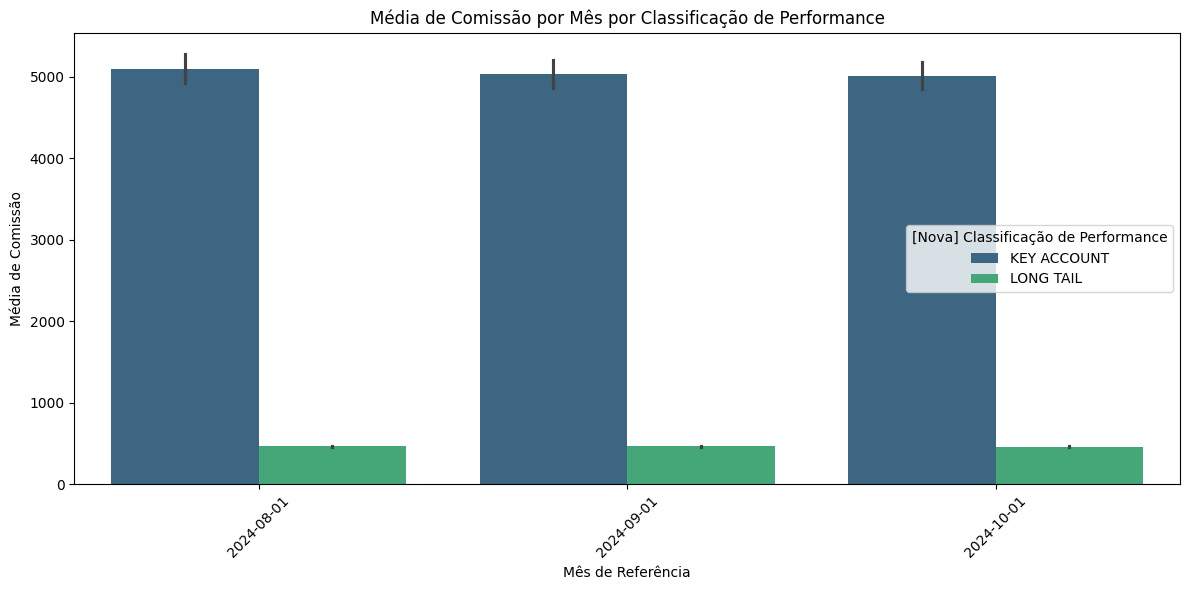

In [71]:
# Atualizando gráficos

# Criando DF usado nos gráficos
grouped_df = df_formatado.groupby(['reference_month', 'frn_id', 'predicted_performance', 'business_model'])['commission'].agg(['mean', 'sum']).reset_index()
grouped_df.rename(columns={'mean': 'mean_commission', 'sum': 'total_commission'}, inplace=True)

# Análise histórica por Performance Classification (PC)
plt.figure(figsize=(12, 6))
seab.barplot(data=grouped_df, x='reference_month', y='mean_commission', hue='predicted_performance', palette='viridis')
plt.title('Média de Comissão por Mês por Classificação de Performance')
plt.ylabel('Média de Comissão')
plt.xlabel('Mês de Referência')
plt.xticks(rotation=45)
plt.legend(title='[Nova] Classificação de Performance')
plt.tight_layout()
plt.show()

# Insights:
#Novo LT mudou em 9367 unidades: 8.37%
#Novo KA mudou em -9367 unidades: -56.16%

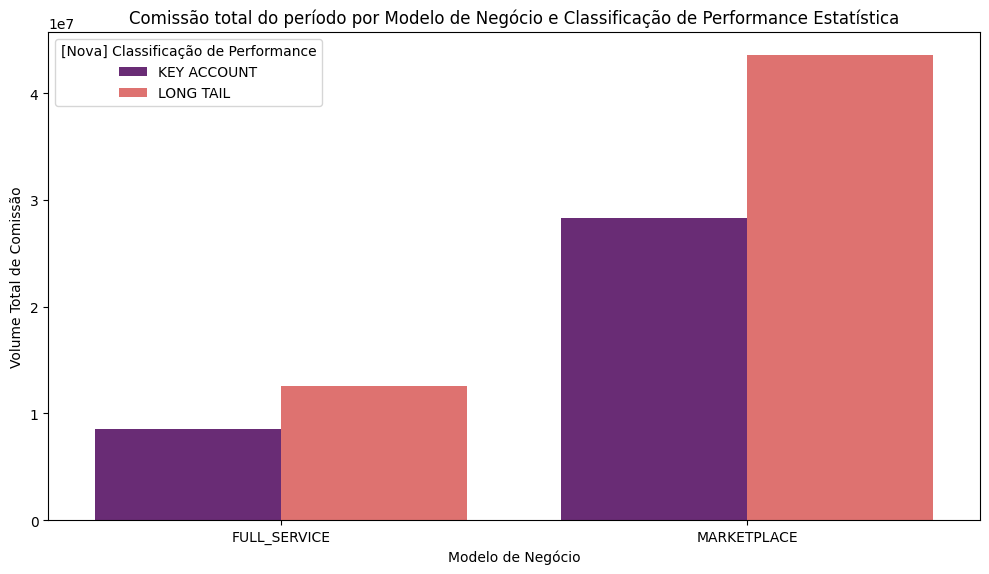

In [65]:
# Atualizando gráficos

# Agrupar os dados para calcular o total de comissão por BM e PC
total_commission_df = df_formatado.groupby(['business_model', 'predicted_performance'])['commission'].sum().reset_index()

# Exibir os resultados da análise
#total_commission_df.head()

# Criar gráfico de barras: concentração de comissão por BM e PC
plt.figure(figsize=(10, 6))
seab.barplot(data=total_commission_df, x='business_model', y='commission', hue='predicted_performance', palette='magma')
plt.title('Comissão total do período por Modelo de Negócio e Classificação de Performance Estatística')
plt.ylabel('Volume Total de Comissão')
plt.xlabel('Modelo de Negócio')
plt.legend(title='[Nova] Classificação de Performance')
plt.tight_layout()
plt.show()

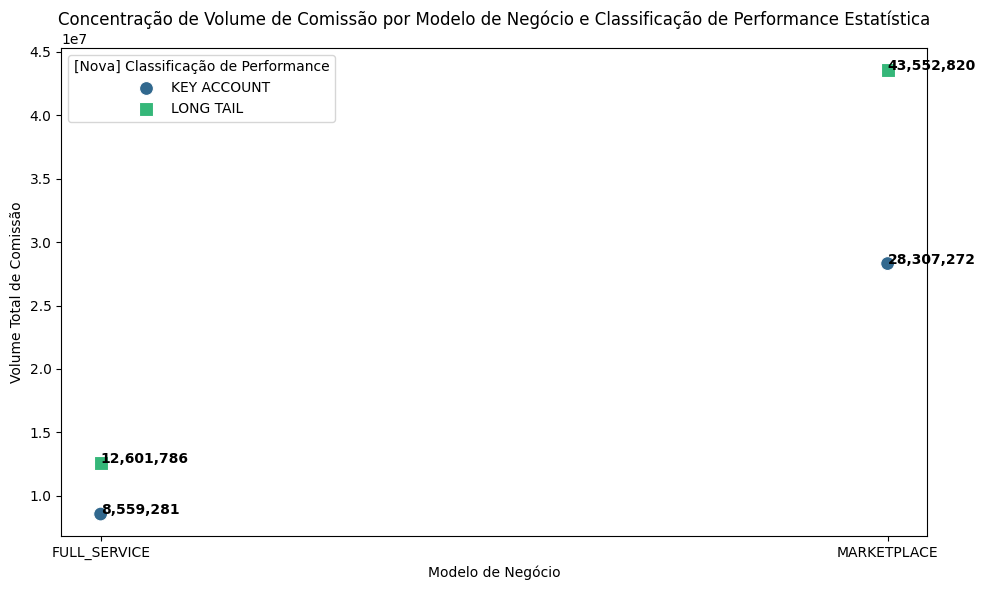

In [67]:
# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
seab.scatterplot(data=total_commission_df,
                 x='business_model',
                 y='commission',
                 hue='predicted_performance',
                 style='predicted_performance',
                 s=100,  # Tamanho dos marcadores
                 palette='viridis',
                 markers=["o", "s"])  # Diferentes marcadores para cada classificação

# Adicionar os rótulos da comissão ao gráfico
for line in range(0, total_commission_df.shape[0]):
    plt.text(total_commission_df['business_model'][line],
             total_commission_df['commission'][line],
             f"{total_commission_df['commission'][line]:,.0f}",
             horizontalalignment='left',
             size='medium',
             color='black',
             weight='semibold')

plt.title('Concentração de Volume de Comissão por Modelo de Negócio e Classificação de Performance Estatística')
plt.ylabel('Volume Total de Comissão')
plt.xlabel('Modelo de Negócio')
plt.legend(title='[Nova] Classificação de Performance')
plt.tight_layout()
plt.show()

# Insights:
# Podemos ver aqui que temos muitos restaurantes concentrados no modelo MARKETPLACE.
# Se analisarmos todas suas características, poderá existir a possibilidade de reclassificação?
# Por isso utilizamos um modelo matemático para levar vários dados em conta para essa classificação (inclusive o AOV).
